## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.870767 -0.311273 -0.252078  0.074239  0.095581  0.596793
1 -0.624733 -1.213959  1.085478 -0.767606 -0.163868 -1.344488
2  0.694757 -1.316404 -0.976136  1.102400  0.529030  0.091626
3 -1.374108 -1.215711 -0.607175  1.097951 -0.157922 -0.512123
4 -0.882357  0.775551  0.894049  1.299581 -0.982297  0.453281


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0096768	total: 57.4ms	remaining: 57.4s
1:	learn: 1.0016531	total: 58.5ms	remaining: 29.2s
2:	learn: 0.9925758	total: 59.3ms	remaining: 19.7s
3:	learn: 0.9815388	total: 60.1ms	remaining: 15s
4:	learn: 0.9728441	total: 60.7ms	remaining: 12.1s
5:	learn: 0.9641536	total: 61.2ms	remaining: 10.1s
6:	learn: 0.9544378	total: 61.7ms	remaining: 8.75s
7:	learn: 0.9467249	total: 62.1ms	remaining: 7.71s
8:	learn: 0.9393955	total: 62.7ms	remaining: 6.9s
9:	learn: 0.9310733	total: 63.2ms	remaining: 6.26s
10:	learn: 0.9227001	total: 63.8ms	remaining: 5.73s
11:	learn: 0.9135143	total: 64.3ms	remaining: 5.29s
12:	learn: 0.9042567	total: 64.8ms	remaining: 4.92s
13:	learn: 0.8959798	total: 65.4ms	remaining: 4.6s
14:	learn: 0.8892236	total: 65.8ms	remaining: 4.32s
15:	learn: 0.8799324	total: 66.9ms	remaining: 4.11s
16:	learn: 0.8719982	total: 67.5ms	remaining: 3.9s
17:	learn: 0.8655760	total: 68ms	remaining: 3.71s
18:	learn: 0.8581190	total: 68.5ms	remaining: 3.54s

92:	learn: 0.4395091	total: 102ms	remaining: 995ms
93:	learn: 0.4351318	total: 103ms	remaining: 988ms
94:	learn: 0.4314585	total: 103ms	remaining: 981ms
95:	learn: 0.4268217	total: 103ms	remaining: 973ms
96:	learn: 0.4233169	total: 104ms	remaining: 966ms
97:	learn: 0.4199985	total: 104ms	remaining: 959ms
98:	learn: 0.4163774	total: 105ms	remaining: 953ms
99:	learn: 0.4127375	total: 105ms	remaining: 947ms
100:	learn: 0.4089446	total: 106ms	remaining: 941ms
101:	learn: 0.4053520	total: 106ms	remaining: 934ms
102:	learn: 0.4022447	total: 107ms	remaining: 928ms
103:	learn: 0.3991917	total: 107ms	remaining: 922ms
104:	learn: 0.3957321	total: 107ms	remaining: 916ms
105:	learn: 0.3925544	total: 108ms	remaining: 910ms
106:	learn: 0.3888411	total: 108ms	remaining: 904ms
107:	learn: 0.3854362	total: 109ms	remaining: 898ms
108:	learn: 0.3822818	total: 109ms	remaining: 894ms
109:	learn: 0.3786635	total: 110ms	remaining: 889ms
110:	learn: 0.3754720	total: 110ms	remaining: 884ms
111:	learn: 0.372188

258:	learn: 0.1136995	total: 180ms	remaining: 516ms
259:	learn: 0.1128490	total: 181ms	remaining: 514ms
260:	learn: 0.1119212	total: 181ms	remaining: 513ms
261:	learn: 0.1111204	total: 182ms	remaining: 512ms
262:	learn: 0.1103065	total: 183ms	remaining: 512ms
263:	learn: 0.1094271	total: 183ms	remaining: 511ms
264:	learn: 0.1085744	total: 184ms	remaining: 510ms
265:	learn: 0.1077047	total: 184ms	remaining: 508ms
266:	learn: 0.1068732	total: 185ms	remaining: 507ms
267:	learn: 0.1061416	total: 185ms	remaining: 505ms
268:	learn: 0.1053210	total: 185ms	remaining: 504ms
269:	learn: 0.1044264	total: 186ms	remaining: 502ms
270:	learn: 0.1037169	total: 186ms	remaining: 501ms
271:	learn: 0.1029198	total: 187ms	remaining: 500ms
272:	learn: 0.1021462	total: 187ms	remaining: 498ms
273:	learn: 0.1013085	total: 188ms	remaining: 497ms
274:	learn: 0.1004719	total: 188ms	remaining: 496ms
275:	learn: 0.0996187	total: 189ms	remaining: 495ms
276:	learn: 0.0988785	total: 189ms	remaining: 494ms
277:	learn: 

478:	learn: 0.0344960	total: 286ms	remaining: 311ms
479:	learn: 0.0344499	total: 286ms	remaining: 310ms
480:	learn: 0.0342635	total: 287ms	remaining: 310ms
481:	learn: 0.0341350	total: 287ms	remaining: 309ms
482:	learn: 0.0339668	total: 288ms	remaining: 308ms
483:	learn: 0.0339223	total: 288ms	remaining: 307ms
484:	learn: 0.0337576	total: 289ms	remaining: 307ms
485:	learn: 0.0335999	total: 289ms	remaining: 306ms
486:	learn: 0.0335569	total: 290ms	remaining: 305ms
487:	learn: 0.0334153	total: 290ms	remaining: 305ms
488:	learn: 0.0332550	total: 291ms	remaining: 304ms
489:	learn: 0.0332132	total: 292ms	remaining: 303ms
490:	learn: 0.0330563	total: 292ms	remaining: 303ms
491:	learn: 0.0330153	total: 293ms	remaining: 302ms
492:	learn: 0.0328639	total: 293ms	remaining: 301ms
493:	learn: 0.0327099	total: 294ms	remaining: 301ms
494:	learn: 0.0325582	total: 294ms	remaining: 300ms
495:	learn: 0.0325185	total: 295ms	remaining: 299ms
496:	learn: 0.0323719	total: 295ms	remaining: 299ms
497:	learn: 

642:	learn: 0.0162981	total: 364ms	remaining: 202ms
643:	learn: 0.0162307	total: 364ms	remaining: 201ms
644:	learn: 0.0161502	total: 365ms	remaining: 201ms
645:	learn: 0.0160962	total: 365ms	remaining: 200ms
646:	learn: 0.0160354	total: 366ms	remaining: 200ms
647:	learn: 0.0159620	total: 366ms	remaining: 199ms
648:	learn: 0.0158652	total: 367ms	remaining: 198ms
649:	learn: 0.0157749	total: 367ms	remaining: 198ms
650:	learn: 0.0157100	total: 368ms	remaining: 197ms
651:	learn: 0.0156350	total: 368ms	remaining: 197ms
652:	learn: 0.0155718	total: 369ms	remaining: 196ms
653:	learn: 0.0154885	total: 369ms	remaining: 195ms
654:	learn: 0.0154384	total: 369ms	remaining: 195ms
655:	learn: 0.0153657	total: 370ms	remaining: 194ms
656:	learn: 0.0152858	total: 370ms	remaining: 193ms
657:	learn: 0.0152413	total: 371ms	remaining: 193ms
658:	learn: 0.0151609	total: 371ms	remaining: 192ms
659:	learn: 0.0151153	total: 372ms	remaining: 191ms
660:	learn: 0.0150457	total: 372ms	remaining: 191ms
661:	learn: 

874:	learn: 0.0064868	total: 469ms	remaining: 67.1ms
875:	learn: 0.0064839	total: 470ms	remaining: 66.5ms
876:	learn: 0.0064476	total: 470ms	remaining: 66ms
877:	learn: 0.0064118	total: 471ms	remaining: 65.4ms
878:	learn: 0.0063835	total: 471ms	remaining: 64.9ms
879:	learn: 0.0063632	total: 472ms	remaining: 64.3ms
880:	learn: 0.0063604	total: 472ms	remaining: 63.8ms
881:	learn: 0.0063397	total: 473ms	remaining: 63.2ms
882:	learn: 0.0063369	total: 473ms	remaining: 62.7ms
883:	learn: 0.0063170	total: 473ms	remaining: 62.1ms
884:	learn: 0.0062954	total: 474ms	remaining: 61.6ms
885:	learn: 0.0062764	total: 474ms	remaining: 61ms
886:	learn: 0.0062418	total: 475ms	remaining: 60.5ms
887:	learn: 0.0062223	total: 475ms	remaining: 60ms
888:	learn: 0.0062196	total: 476ms	remaining: 59.4ms
889:	learn: 0.0061857	total: 476ms	remaining: 58.8ms
890:	learn: 0.0061624	total: 477ms	remaining: 58.3ms
891:	learn: 0.0061434	total: 477ms	remaining: 57.8ms
892:	learn: 0.0061402	total: 477ms	remaining: 57.2ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

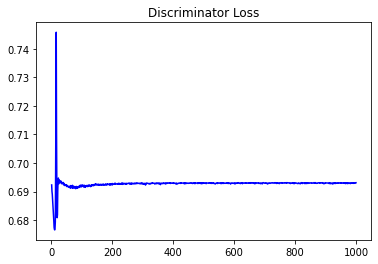

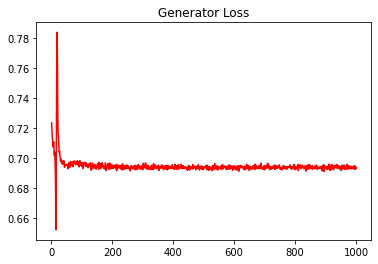

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.025764370665062066


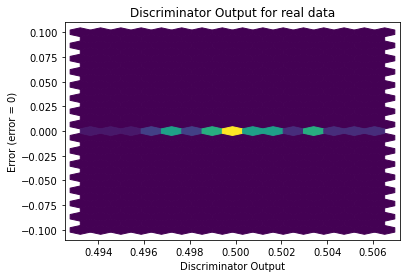

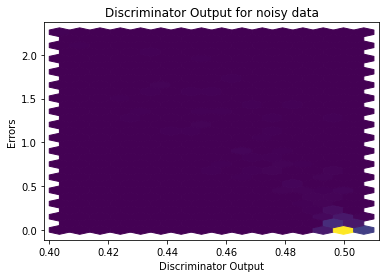

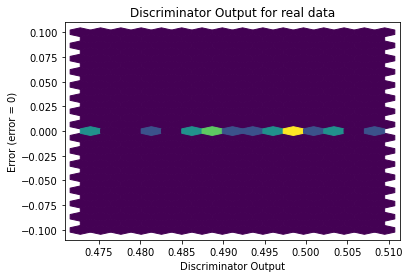

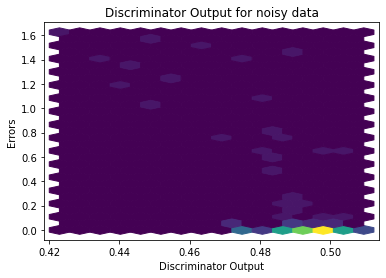

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


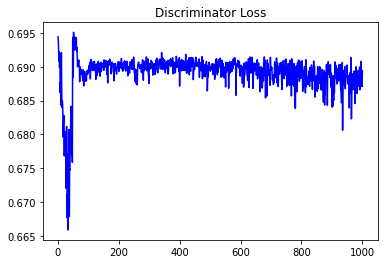

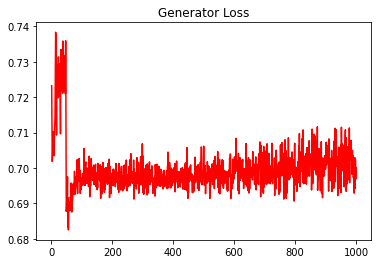

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.016618202444030655


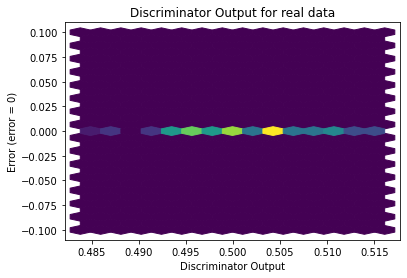

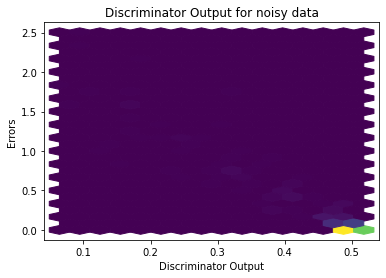

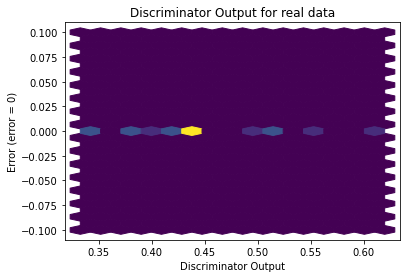

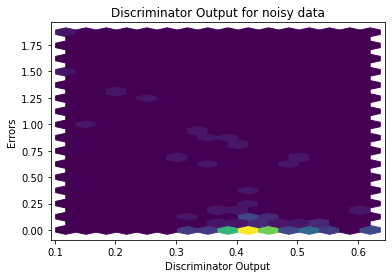

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2084]], requires_grad=True)
